In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

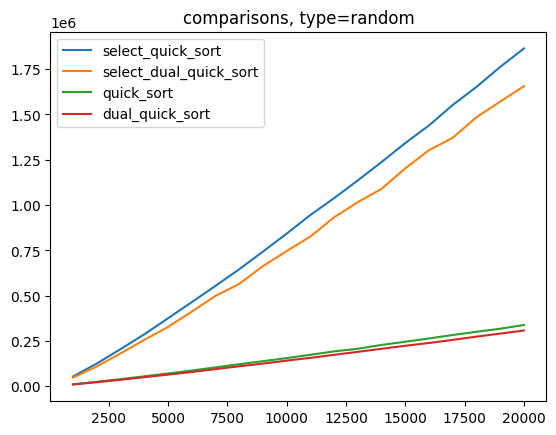

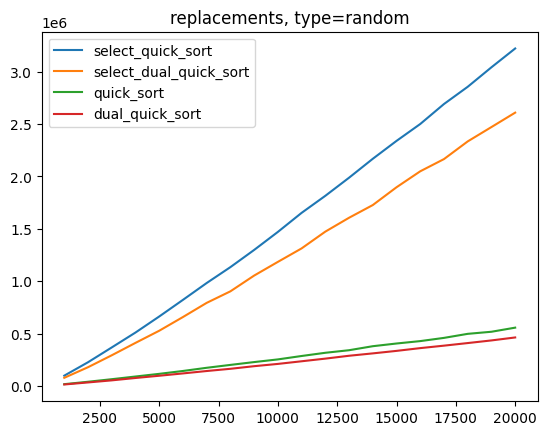

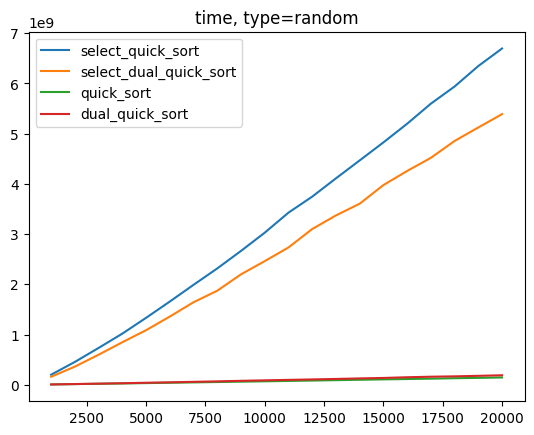

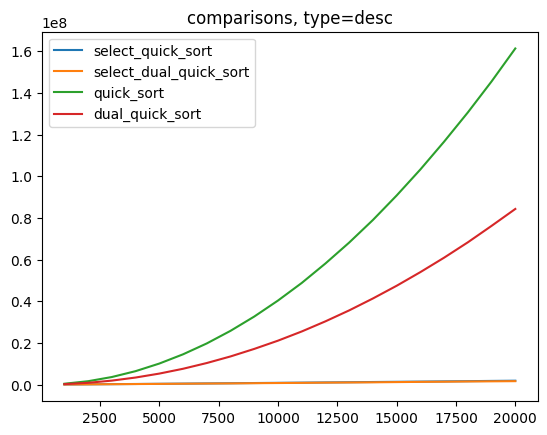

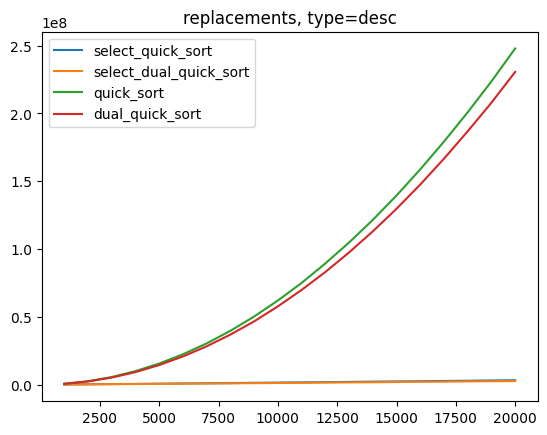

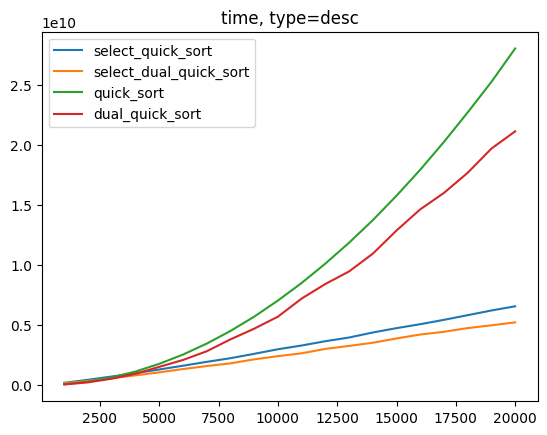

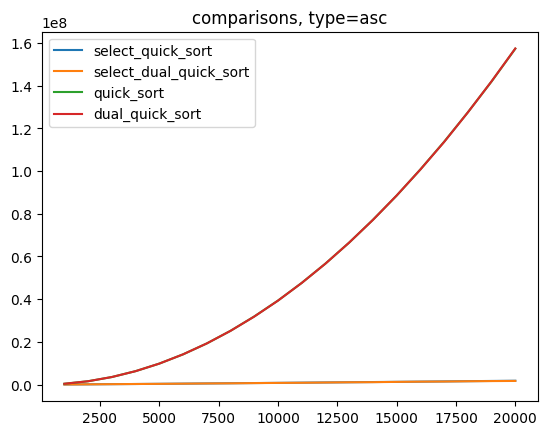

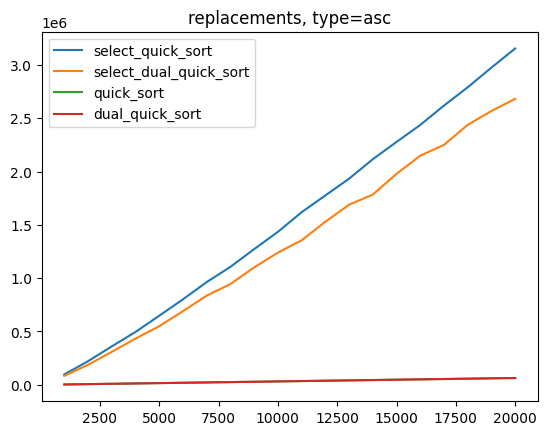

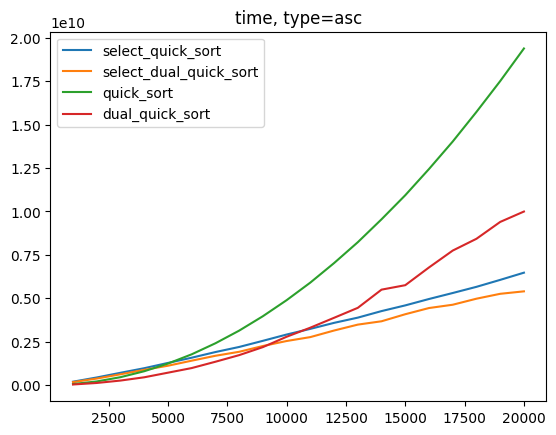

In [2]:
data_begin = 1000                                            # beginning of data range
data_end = 20000                                             # end of data range (inclusive)
data_step = 1000                                             # data range step
data_range = np.arange(data_begin, data_end + 1, data_step)  # array of data values
data_size = len(data_range)                                  # length of the data values array

sort_types = ["select_quick_sort", "select_dual_quick_sort", "quick_sort", "dual_quick_sort"]

m = 100 # number of repeats for a single experiment

for t in ["random", "desc", "asc"]: # type of the input data

    comparisons = np.zeros((4, data_size), int)
    replacements = np.zeros((4, data_size), int)
    time = np.zeros((4, data_size), int) 

    for s in range(len(sort_types)): # division size

        for n in data_range: # size of the input

            # read results and sum them

            data = open(f"results/{sort_types[s]}_{t}_{n}.txt", "r")
            for result in data.readlines():
                result_split = result.rstrip("\n").split(" ")
                result_split = [eval(i) for i in result_split]
                comparisons[s][n // data_step - 1] += result_split[0]
                replacements[s][n // data_step - 1] += result_split[1]
                time[s][n // data_step - 1] += result_split[2]

    # take the average

    for s in range(len(sort_types)):
        comparisons[s] = comparisons[s] / m
        replacements[s] = replacements[s] / m

    # plot the averages

    for s in range(len(sort_types)):
        plt.plot(data_range, comparisons[s], label=f"{sort_types[s]}")
    plt.title(f"comparisons, type={t}")
    plt.legend()
    plt.show()
    
    for s in range(len(sort_types)):
        plt.plot(data_range, replacements[s], label=f"{sort_types[s]}")
    plt.title(f"replacements, type={t}")
    plt.legend()
    plt.show()
    
    for s in range(len(sort_types)):
        plt.plot(data_range, time[s], label=f"{sort_types[s]}")
    plt.title(f"time, type={t}")
    plt.legend()
    plt.show()



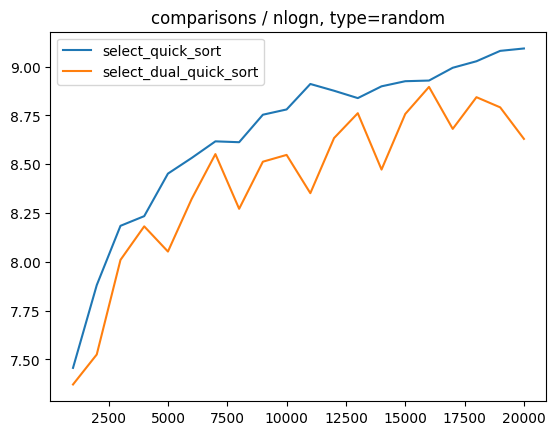

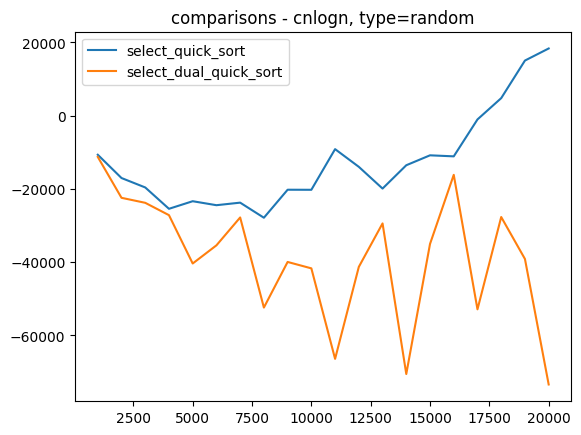

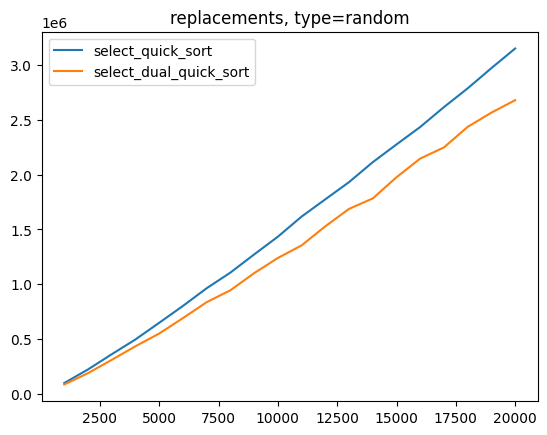

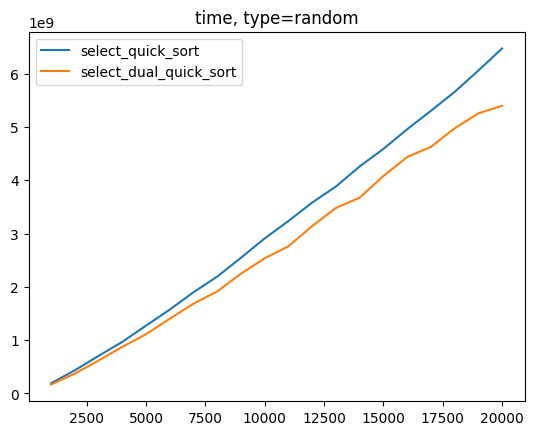

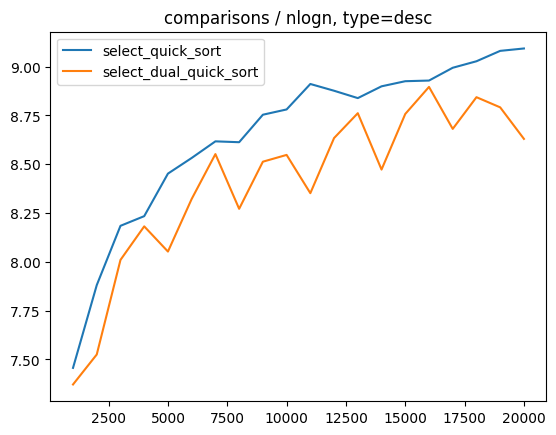

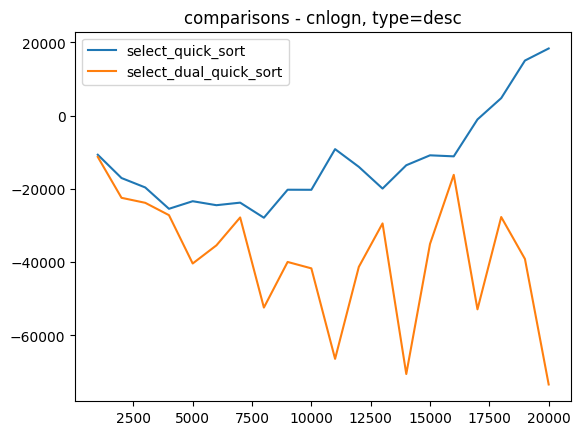

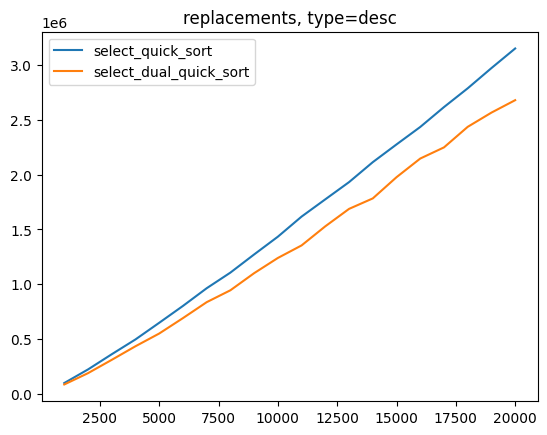

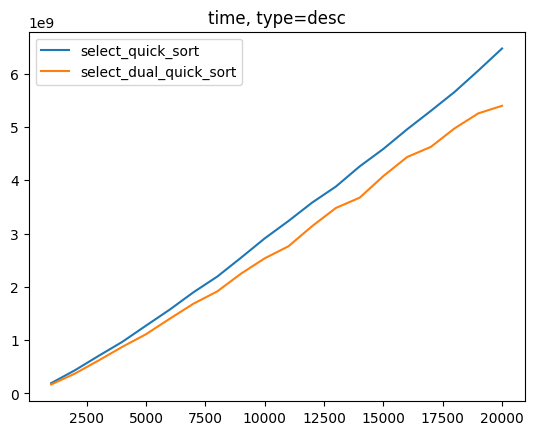

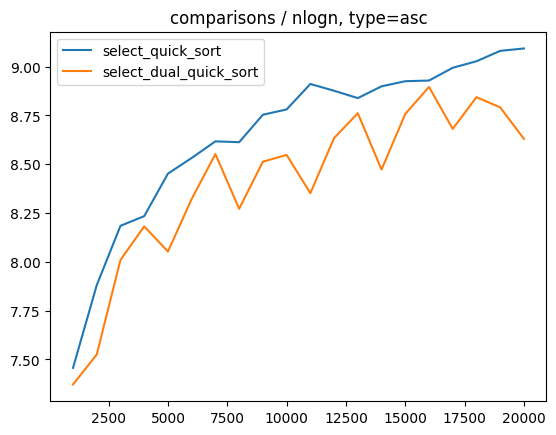

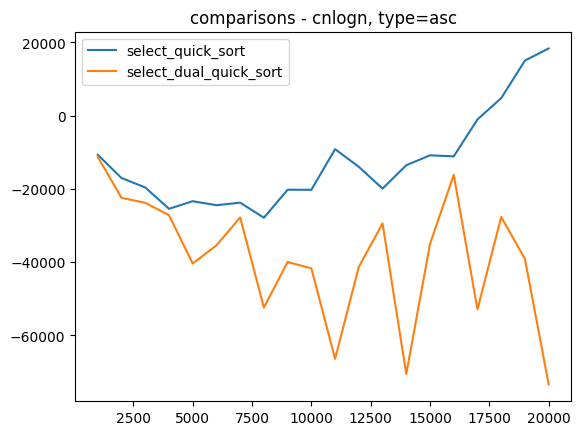

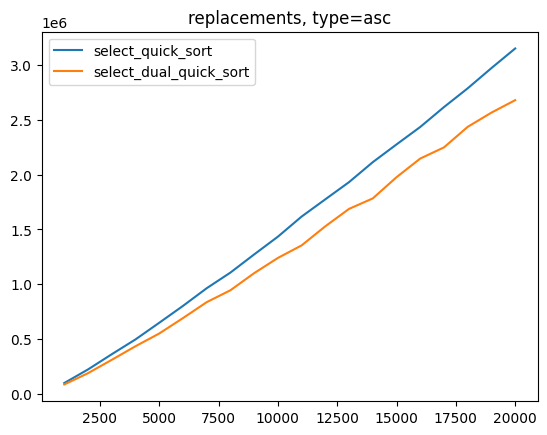

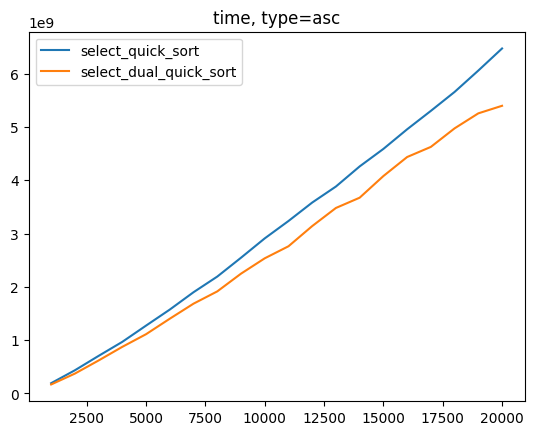

In [10]:
for t in ["random", "desc", "asc"]: # type of the input data

    for s in range(len(["select_quick_sort", "select_dual_quick_sort"])):
        plt.plot(data_range, comparisons[s] / data_range / np.log(data_range), label=f"{sort_types[s]}")
    plt.title(f"comparisons / nlogn, type={t}")
    plt.legend()
    plt.show()
    
    for s in range(len(["select_quick_sort", "select_dual_quick_sort"])):
        plt.plot(data_range, comparisons[s] - 9 * data_range * np.log(data_range), label=f"{sort_types[s]}")
    plt.title(f"comparisons - cnlogn, type={t}")
    plt.legend()
    plt.show()

    for s in range(len(["select_quick_sort", "select_dual_quick_sort"])):
        plt.plot(data_range, replacements[s], label=f"{sort_types[s]}")
    plt.title(f"replacements, type={t}")
    plt.legend()
    plt.show()

    for s in range(len(["select_quick_sort", "select_dual_quick_sort"])):
        plt.plot(data_range, time[s], label=f"{sort_types[s]}")
    plt.title(f"time, type={t}")
    plt.legend()
    plt.show()